<a href="https://colab.research.google.com/github/Solomon-Banuba/Data_Analytics_Python_23/blob/main/Flight_Booking_and_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name:** Flight booking and Sales Performance Analysis

**Presented By:** Solomon Banuba

**Motivation:** This project aimed to put into practice the knowledge acquired through participation in the Data Analytics with Python course at ReDI School. In my role as a data/business analyst at an airline company, I collaborated with the Revenue and Net Planning departments to derive actionable insights from the provided data. The project simulated a real-world working approach to executing data analysis projects.

*   Business Request:

**Overview:**

The Revenue and Net Planning departments provide you with Spain's (fictional) sales and flight data. The dataset includes the performance of all easter flights in 2019 and in 2023. With the help of your analysis, they want to compare the company’s sales and flight performance this year vs the pre-Corona status. Based on this comparison, they want you to create actionable insights.

**Tasks:**

● What can be done with the data in Power BI? Analyse the provided dataset and
provide a dashboard for the stakeholders.

● What key figures can be developed from the dataset?

● Identify interesting trends/outliers/developments and derive actionable
insights for the stakeholders.

**Bonus Points:**

● What additional data from other sources could be included to gain meaningful
insights?

● The column for the new route identifier had some issues during the data load.
Show us a clever way to fill in the missing data.

● Include ad-hoc analytical scripts in R or Python to gain meaningful insights.

.............................................

**Structure of Project:**

1.   DATA ACQUISITION: Sourcing Data
2.   DATA EXPLORATION: Summarise information about the datasets
3.   DATA CLEANING: Fill/drop null values, data validation, etc.
4.   DATA TRANSFORMATION: Joins, categorisation, feature engineering
5.   DATA ANALYSIS: Deriving insights from the project - using visualisations

**Importing Libraries**

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

**1. DATA ACQUISITION**

**Loading dataset**

The data is sourced from kaggle and downloaded to local drive. Three csv files namely Bookings, Flightinfo and SalesDetails.

In [41]:
from google.colab import files

uploaded = files.upload()

Saving Booking.csv to Booking.csv
Saving FlightInf.csv to FlightInf.csv
Saving SalesDetai.csv to SalesDetai.csv




Reading CSV files into pandas dataframe.




In [42]:
bookings = pd.read_csv(io.BytesIO(uploaded['Booking.csv']))
flights = pd.read_csv(io.BytesIO(uploaded['FlightInf.csv']))
sales = pd.read_csv(io.BytesIO(uploaded['SalesDetai.csv']))

.........................................

# 2. DATA EXPLORATION

Summarise information about the datasets






    Overview of the data




In [43]:
# Display the first few rows of the datasets
bookings.head()

,BookingCode,BookingDate,FlightDate,FlightNumber,BookedSeats,RevenueActualFare,Ancillary Revenue
0,PNR0001,08.02.2020 00:00,10.04.2023,EW9443,2.0,430.0,20.0
1,PNR0002,13.02.2020 00:00,09.04.2023,EW9587,5.0,525.0,137.0
2,PNR0003,18.02.2020 00:00,08.04.2023,EW7580,2.0,370.0,72.0
3,PNR0004,27.03.2020 00:00,06.04.2023,EW7580,4.0,629.0,115.0
4,PNR0005,04.04.2020 00:00,10.04.2023,EW9591,2.0,449.0,47.0


In [45]:
flights.head()

,FlightId,OriginDestination,CustomClusterName,IsNew,Capacity,FlightCosts
0,10.04.2023EW8590,BER-PMI,Balearic Islands,NaN,180,10080
1,06.04.2023EW8590,BER-PMI,Balearic Islands,NaN,180,9504
2,07.04.2023EW6893,BER-PMI,Balearic Islands,NaN,180,9984
3,11.04.2023EW8590,BER-PMI,Balearic Islands,NaN,180,9696
4,08.04.2023EW8592,BER-PMI,Balearic Islands,NaN,180,10080


In [46]:
sales.head()

,BookingID,Customer Group,Sales Group
0,PNR0001,OTA,Direct Connect
1,PNR0002,OTA,Direct Connect
2,PNR0003,OTA,Direct Connect
3,PNR0004,EndCustomer,Web
4,PNR0005,OTA,Direct Connect


###### Check  structure  of dataframe

In [48]:
#
bookings.shape

(39800, 7)

In [49]:
flights.shape

(1247, 6)

In [50]:
sales.shape

(37046, 3)

Check data types

In [51]:
bookings.dtypes

BookingCode           object
BookingDate           object
FlightDate            object
FlightNumber          object
BookedSeats          float64
RevenueActualFare    float64
Ancillary Revenue    float64
dtype: object

In [52]:
flights.dtypes

FlightId             object
OriginDestination    object
CustomClusterName    object
IsNew                object
Capacity              int64
FlightCosts           int64
dtype: object

In [53]:
sales.dtypes

BookingID         object
Customer Group    object
Sales Group       object
dtype: object

Note: Some columns need to be converted to their correct data types

Information about the dataset (columns, data types, non-null values)

In [60]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39800 entries, 0 to 39799
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   BookingCode        39800 non-null  object        
 1   BookingDate        39798 non-null  datetime64[ns]
 2   FlightDate         39798 non-null  datetime64[ns]
 3   FlightNumber       0 non-null      float64       
 4   BookedSeats        39798 non-null  float64       
 5   RevenueActualFare  39798 non-null  float64       
 6   Ancillary Revenue  39797 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 2.1+ MB


In [61]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   FlightId           1247 non-null   object
 1   OriginDestination  1247 non-null   object
 2   CustomClusterName  1247 non-null   object
 3   IsNew              56 non-null     object
 4   Capacity           1247 non-null   int64 
 5   FlightCosts        1247 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 58.6+ KB


In [62]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37046 entries, 0 to 37045
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BookingID       37046 non-null  object
 1   Customer Group  37046 non-null  object
 2   Sales Group     37046 non-null  object
dtypes: object(3)
memory usage: 868.4+ KB


Summary statistics of numerical columns

In [66]:
bookings.describe()

,BookedSeats,RevenueActualFare,Ancillary Revenue
count,39798.000000,39798.000000,39797.000000
mean,2.026534,290.581838,67.509058
std,1.172359,4290.646798,53.834905
min,1.000000,10.000000,0.000000
25%,1.000000,130.000000,27.000000
50%,2.000000,210.000000,52.000000
75%,2.000000,342.000000,90.000000
max,9.000000,855252.000000,885.000000


In [68]:
flights.describe()

,Capacity,FlightCosts
count,1247.000000,1247.000000
mean,177.427426,9138.315958
std,3.738136,2000.624114
min,172.000000,5952.000000
25%,172.000000,6784.000000
50%,180.000000,9504.000000
75%,180.000000,10080.000000
max,180.000000,12360.000000


In [69]:
sales.describe()

,BookingID,Customer Group,Sales Group
count,37046,37046,37046
unique,37046,4,3
top,PNR0001,EndCustomer,Web
freq,1,29450,30087


The flight number is off. So it is better to restore data type (object)

######Convert to appropriate data types

In [65]:
bookings['FlightNumber'] = bookings['FlightNumber'].apply(str)

In [64]:
# Bookings -
bookings['FlightDate'] = pd.to_datetime(bookings['FlightDate'], errors='coerce')
bookings['BookingDate'] = pd.to_datetime(bookings['BookingDate'], errors='coerce')
bookings.dtypes


BookingCode                  object
BookingDate          datetime64[ns]
FlightDate           datetime64[ns]
FlightNumber                float64
BookedSeats                 float64
RevenueActualFare           float64
Ancillary Revenue           float64
dtype: object

### Visual Explorations

-- Histogram:

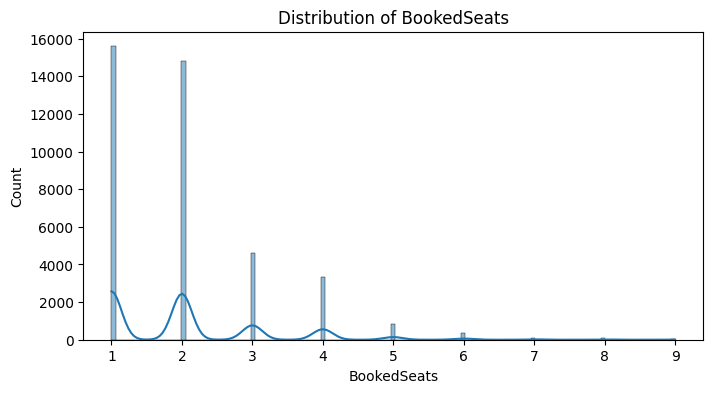

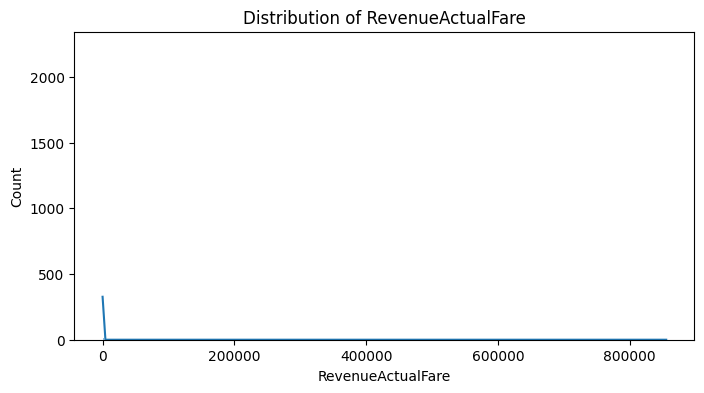

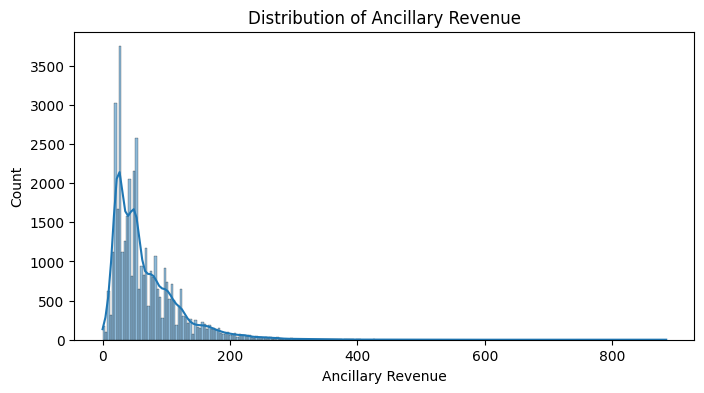

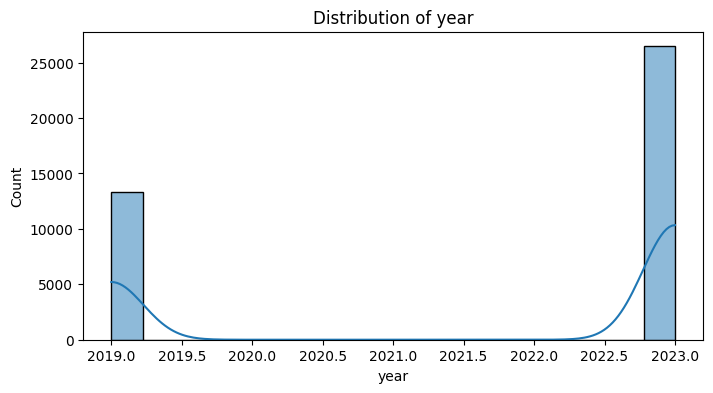

In [98]:
numeric_columns = bookings.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=bookings, x=column, kde=True)
    plt.title(f'Distribution of {column}',)
    plt.show()


For flights

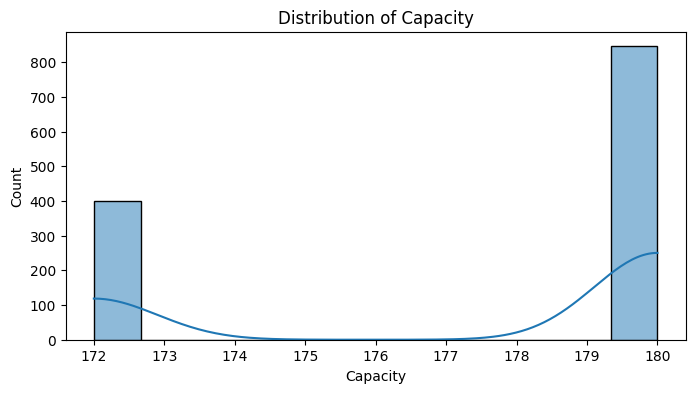

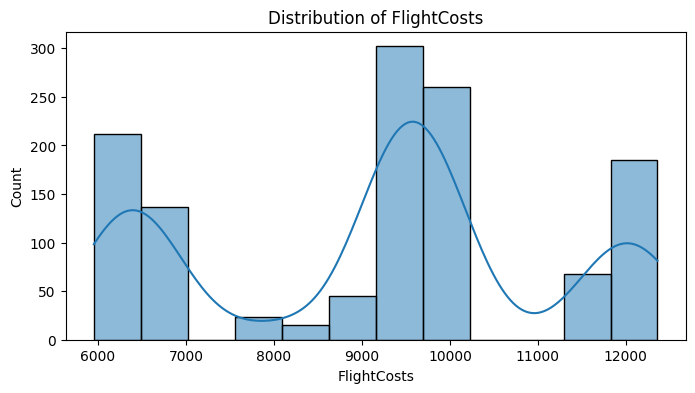

In [99]:
numeric_columns = flights.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=flights, x=column, kde=True)
    plt.title(f'Distribution of {column}',)
    plt.show()

..................................

# 3. DATA CLEANING

3.1 Check column names(if there is need for renaming)

In [71]:
bookings.columns

Index(['BookingCode', 'BookingDate', 'FlightDate', 'FlightNumber',
       'BookedSeats', 'RevenueActualFare', 'Ancillary Revenue'],
      dtype='object')

In [72]:
flights.columns

Index(['FlightId', 'OriginDestination', 'CustomClusterName', 'IsNew',
       'Capacity', 'FlightCosts'],
      dtype='object')

In [73]:
sales.columns

Index(['BookingID', 'Customer Group', 'Sales Group'], dtype='object')

* Change "BookingCode" to "BookingID" as a key to joining Bookings to Sales



In [75]:
bookings.rename(columns={'BookingCode': 'BookingID'}, inplace=True)
bookings.columns

Index(['BookingID', 'BookingDate', 'FlightDate', 'FlightNumber', 'BookedSeats',
       'RevenueActualFare', 'Ancillary Revenue'],
      dtype='object')

3.2 Checking and fixing  missing values

        - Bookings



In [78]:
# Checking missing values in Bookings
bookings.isnull().sum()

BookingID            0
BookingDate          2
FlightDate           2
FlightNumber         0
BookedSeats          2
RevenueActualFare    2
Ancillary Revenue    3
dtype: int64

In [80]:
# Drop missing values BookingDate and FlightDate columns
bookings.dropna(subset=['BookingDate'], inplace=True)
bookings.dropna(subset=['FlightDate'], inplace=True)
bookings.isnull().sum()

BookingID            0
BookingDate          0
FlightDate           0
FlightNumber         0
BookedSeats          0
RevenueActualFare    0
Ancillary Revenue    1
dtype: int64

In [91]:
# Replace missing value in Ancillary Revenue with the average Ancillary revenue.
bookings['Ancillary Revenue'].fillna(67.50, inplace=True)
bookings.isnull().sum()

BookingID            0
BookingDate          0
FlightDate           0
FlightNumber         0
BookedSeats          0
RevenueActualFare    0
Ancillary Revenue    0
year                 0
dtype: int64

        - Flights

In [92]:
flights.isnull().sum()

FlightId                0
OriginDestination       0
CustomClusterName       0
IsNew                1191
Capacity                0
FlightCosts             0
dtype: int64

Note:
The column for the new route identifier had some issues during the data load. Show us a clever way to fill in the missing data.

-- Will deal when the dataframes are merged together under the transformation phase

In [93]:
sales.isnull().sum()

BookingID         0
Customer Group    0
Sales Group       0
dtype: int64

3.3 Check and fix  duplicates

      -- Bookings

In [102]:
# Check for Duplicates
bookings_dup = bookings[bookings.duplicated()]
bookings_dup

,BookingID,BookingDate,FlightDate,FlightNumber,BookedSeats,RevenueActualFare,Ancillary Revenue,year


In [101]:
# Remove duplicates
bookings.drop_duplicates(inplace=True)


    -- Flights

In [103]:
flights_dup = flights[flights.duplicated()]
flights_dup

,FlightId,OriginDestination,CustomClusterName,IsNew,Capacity,FlightCosts


      - Sales

In [104]:
sales_dup = sales[sales.duplicated()]
sales_dup

,BookingID,Customer Group,Sales Group


# DATA TRANSFORMATION

###### Merge(joining) all three data sets

In [106]:
bookings.head()


,BookingID,BookingDate,FlightDate,FlightNumber,BookedSeats,RevenueActualFare,Ancillary Revenue,year
0,PNR0001,2020-08-02,2023-10-04,nan,2.0,430.0,20.0,2023
1,PNR0002,2020-02-13,2023-09-04,nan,5.0,525.0,137.0,2023
2,PNR0003,2020-02-18,2023-08-04,nan,2.0,370.0,72.0,2023
3,PNR0004,2020-03-27,2023-06-04,nan,4.0,629.0,115.0,2023
4,PNR0005,2020-04-04,2023-10-04,nan,2.0,449.0,47.0,2023


In [107]:
flights.head()


,FlightId,OriginDestination,CustomClusterName,IsNew,Capacity,FlightCosts
0,10.04.2023EW8590,BER-PMI,Balearic Islands,NaN,180,10080
1,06.04.2023EW8590,BER-PMI,Balearic Islands,NaN,180,9504
2,07.04.2023EW6893,BER-PMI,Balearic Islands,NaN,180,9984
3,11.04.2023EW8590,BER-PMI,Balearic Islands,NaN,180,9696
4,08.04.2023EW8592,BER-PMI,Balearic Islands,NaN,180,10080


In [108]:
sales.head()

,BookingID,Customer Group,Sales Group
0,PNR0001,OTA,Direct Connect
1,PNR0002,OTA,Direct Connect
2,PNR0003,OTA,Direct Connect
3,PNR0004,EndCustomer,Web
4,PNR0005,OTA,Direct Connect


In [109]:
# Rename FlighNumber to FlightId
bookings.rename(columns={'FlightNumber': 'FlightId'}, inplace=True)
bookings.columns

Index(['BookingID', 'BookingDate', 'FlightDate', 'FlightId', 'BookedSeats',
       'RevenueActualFare', 'Ancillary Revenue', 'year'],
      dtype='object')

Merge Bookings with Sales first

In [116]:
booking_sale = pd.merge(bookings, sales, on='BookingID', how='left')
booking_sale.head()

,BookingID,BookingDate,FlightDate,FlightId,BookedSeats,RevenueActualFare,Ancillary Revenue,year,Customer Group,Sales Group
0,PNR0001,2020-08-02,2023-10-04,nan,2.0,430.0,20.0,2023,OTA,Direct Connect
1,PNR0002,2020-02-13,2023-09-04,nan,5.0,525.0,137.0,2023,OTA,Direct Connect
2,PNR0003,2020-02-18,2023-08-04,nan,2.0,370.0,72.0,2023,OTA,Direct Connect
3,PNR0004,2020-03-27,2023-06-04,nan,4.0,629.0,115.0,2023,EndCustomer,Web
4,PNR0005,2020-04-04,2023-10-04,nan,2.0,449.0,47.0,2023,OTA,Direct Connect


Merge flights with booking_sale

In [123]:
booking_flight_sale = pd.merge(flights, booking_sale,  on='FlightId', how='left')
booking_flight_sale.tail()

,FlightId,OriginDestination,CustomClusterName,IsNew,Capacity,FlightCosts,BookingID,BookingDate,FlightDate,BookedSeats,RevenueActualFare,Ancillary Revenue,year,Customer Group,Sales Group
1242,09.04.2023EW9571,XRY-DUS,Iberian Peninsula,NaN,172,6592,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1243,12.04.2023EW9571,XRY-DUS,Iberian Peninsula,NaN,172,6464,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1244,19.04.2019EW9571,XRY-DUS,Iberian Peninsula,NaN,172,6400,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1245,21.04.2019EW9571,XRY-DUS,Iberian Peninsula,NaN,172,5952,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1246,23.04.2019EW9571,XRY-DUS,Iberian Peninsula,NaN,172,6400,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
booking_flight_sale.shape

(39797, 15)